In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import yfinance as yf

In [3]:
df = yf.download('0066.HK',start='2004-01-02', end='2009-06-30')
df = df['Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Close
Date,
2004-01-02,10.350000
2004-01-05,10.400000
2004-01-06,10.450000
2004-01-07,10.550000
2004-01-08,10.750000
...,...
2009-06-23,22.950001
2009-06-24,23.500000
2009-06-25,23.299999


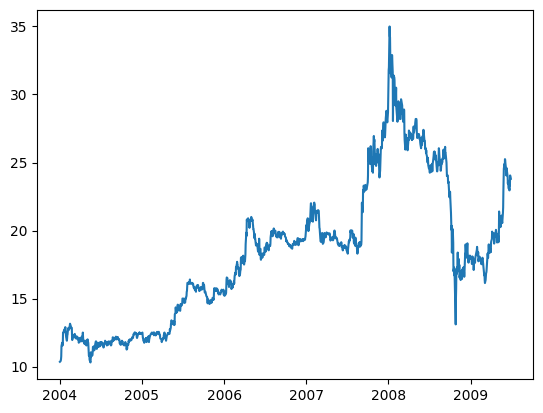

In [5]:
plt.plot(df)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rdata = scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
rdata

array([[0.0020243 ],
       [0.00404856],
       [0.00607286],
       ...,
       [0.52631575],
       [0.55668013],
       [0.54655867]])

In [8]:
training_size=int(len(rdata)*0.65)
train_period, test_period = rdata[0:training_size, :], rdata[training_size:len(rdata), :]

In [9]:
train_period.shape, test_period.shape

((889, 1), (479, 1))

In [10]:
train_period

array([[0.0020243 ],
       [0.00404856],
       [0.00607286],
       [0.01012146],
       [0.01821862],
       [0.04858299],
       [0.05870445],
       [0.05668015],
       [0.05060729],
       [0.05870445],
       [0.08906882],
       [0.08906882],
       [0.09514168],
       [0.09716598],
       [0.09716598],
       [0.09716598],
       [0.10526314],
       [0.10323887],
       [0.08906882],
       [0.08097166],
       [0.07489876],
       [0.06477731],
       [0.0708502 ],
       [0.08097166],
       [0.08299596],
       [0.09109312],
       [0.10323887],
       [0.09919028],
       [0.09716598],
       [0.10121458],
       [0.09919028],
       [0.11538459],
       [0.11336033],
       [0.11133603],
       [0.10931173],
       [0.10526314],
       [0.10323887],
       [0.10323887],
       [0.07894736],
       [0.0668016 ],
       [0.08299596],
       [0.07894736],
       [0.07489876],
       [0.07894736],
       [0.07692306],
       [0.07894736],
       [0.08502022],
       [0.082

In [11]:
test_period

array([[0.39271255],
       [0.39190281],
       [0.39271255],
       [0.39190281],
       [0.38461535],
       [0.3716599 ],
       [0.37489876],
       [0.38218622],
       [0.35870444],
       [0.35465584],
       [0.35546558],
       [0.35060725],
       [0.34736838],
       [0.3716599 ],
       [0.36275304],
       [0.34898785],
       [0.34736838],
       [0.34817812],
       [0.33846153],
       [0.33441293],
       [0.3238866 ],
       [0.34331986],
       [0.34170039],
       [0.34655872],
       [0.35546558],
       [0.35222672],
       [0.35870444],
       [0.35465584],
       [0.34493925],
       [0.34574899],
       [0.35060725],
       [0.35060725],
       [0.36113357],
       [0.41700406],
       [0.47570847],
       [0.44939269],
       [0.44736843],
       [0.51214578],
       [0.51417004],
       [0.50607284],
       [0.52631575],
       [0.51012144],
       [0.51214578],
       [0.52226723],
       [0.51214578],
       [0.52834009],
       [0.51821864],
       [0.514

In [12]:
def create_dataset(dataperiod, time_step=10):
    dataX, dataY = [], []
    for i in range(len(dataperiod)-time_step-1):
        a = dataperiod[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataperiod[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_period, time_step)
X_test, y_test = create_dataset(test_period, time_step)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((788, 100), (788,), (378, 100), (378,))

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0464 - val_loss: 0.0259
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - loss: 6.3699e-04 - val_loss: 0.0045
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 5.6390e-04 - val_loss: 0.0044
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 5.8870e-04 - val_loss: 0.0045
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 4.6358e-04 - val_loss: 0.0042
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step - loss: 5.4947e-04 - val_loss: 0.0043
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - loss: 4.3777e-04 - val_loss: 0.0041
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 4.5377e-04 - val_loss: 0.0039


In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

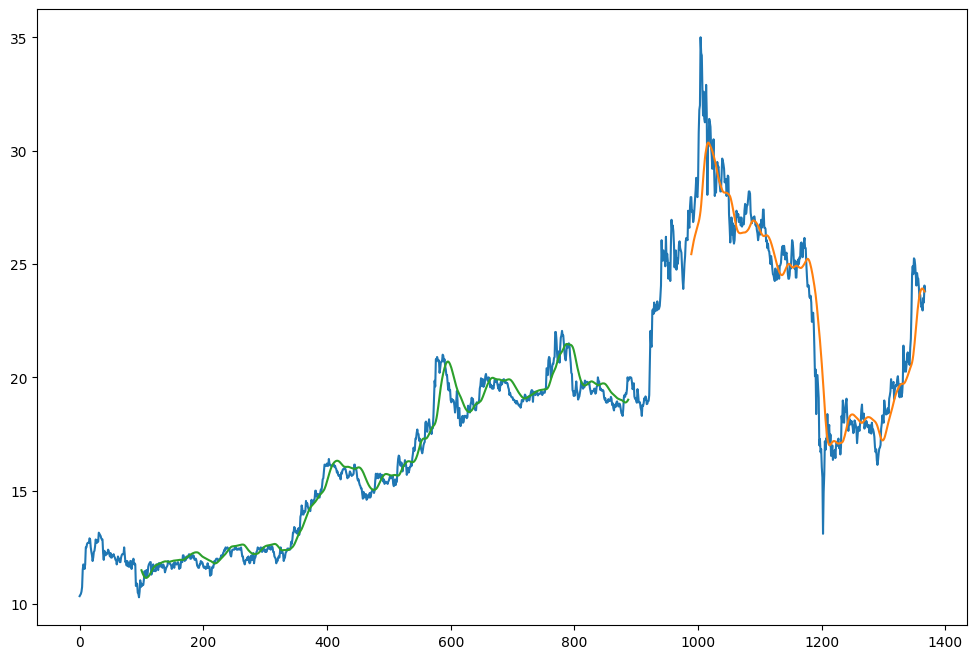

In [21]:
look_back=100
trainPredictPlot=np.empty_like(rdata)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot=np.empty_like(rdata)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(rdata)-1,:] = test_predict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

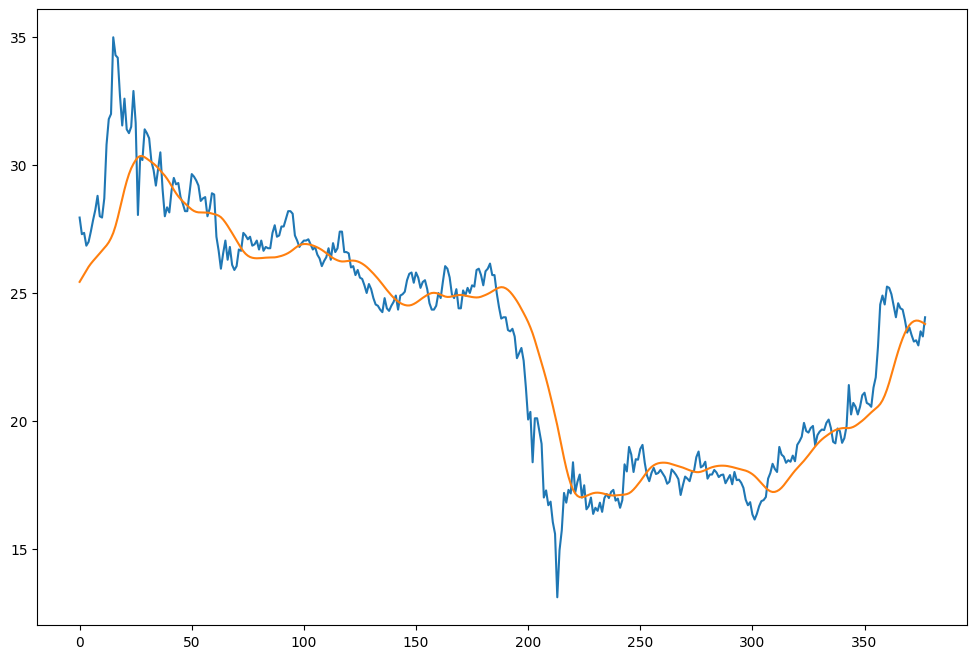

In [22]:
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(rdata)[len(train_predict)+(look_back*2)+1:len(rdata)-1])
plt.plot(test_predict)
plt.show